### Practice Project - 7

# Grades of Students dataset
Problem Statement:

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description    --  total 43 columns

-Seat No : The enrolled number of candidate that took the exams

-

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.

 

·       All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam


 

Predict   CGPA of a student based on different grades in four years.
Downlaod Files:

    https://github.com/dsrscientist/dataset4
    https://github.com/dsrscientist/dataset4/blob/main/Grades.csv

## Importing required Liabraries

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')

### Importing data and converting it into data frame

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')
data.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


## Observations

1. Data is distributed into Grades, there are 43 columns in our data.
2. Some of them are negative and some of them are positive, data is mainly distributed in grades
3. Further need to explore more data. 
4. Being with data checking and correting it

In [3]:
# Checking data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

### Observations

1. Our data is further distributed into 2 types.
a. Object 
b. Float

2. Need to convert this data to int

3. Our target column will remain as float

In [4]:
# Checking column names

data.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

Need to rename columns to make further data processing

In [5]:
data_columns = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA']

In [6]:
data = data [data_columns].copy()

In [7]:
# Renaming columns

dta = data.rename ({ 'PH-121':'PH_121',  'HS-101':'HS_101',  'CY-105': 'CY_105', 'HS-105/12':'HS_105_12',
'MT-111': 'MT_111', 'CS-105': 'CS_105','CS-106':'CS_106','EL-102':'EL_102', 'EE-119':'EE_119', 
'ME-107':'ME_107', 'CS-107':'CS_107', 'HS-205/20':'HS_205_20','MT-222':'MT_222', 'EE-222':'EE_222',
'MT-224':'MT_224', 'CS-210':'CS_210','CS-211':'CS_211','CS-203':'CS_203','CS-214':'CS_214','EE-217':'EE_217', 
'CS-212':'CS_212', 'CS-215':'CS_215', 'MT-331':'MT_331', 'EF-303':'EF_303', 'HS-304':'HS_304', 'CS-301':'CS_301',
       'CS-302':'CS_302', 'TC-383':'TC_383', 'MT-442':'MT_442', 'EL-332':'EL_332', 'CS-318':'CS_318', 'CS-306':'CS_306',
    'CS-312':'CS_312', 'CS-317':'CS_317', 'CS-403':'CS_403', 'CS-421':'CS_421', 'CS-406':'CS_406', 
    'CS-414':'CS_414', 'CS-419':'CS_419', 'CS-423':'CS_423', 'CS-412':'CS_412', 'CGPA':'CGPA'}, axis = 1)

I have now renamed all columns, further need to check same data for what variables does our data have as data is distributed in grades need to convert all the grades to number

In [8]:
# Checking sample data by grouping them

print(dta.CS_212.value_counts())
print('*'*10)
print(dta.HS_101.value_counts())
print('*'*10)
print(dta.CY_105.value_counts())
print ('*'*10)
print (dta.MT_222.value_counts())

A-    101
B+     86
B      81
B-     65
C      44
A      43
D+     36
C+     35
C-     35
D      33
A+      4
WU      2
Name: CS_212, dtype: int64
**********
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS_101, dtype: int64
**********
A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY_105, dtype: int64
**********
A-    86
A     80
D     66
B     61
B-    52
D+    46
C     43
B+    42
C+    39
C-    30
A+    16
F      3
WU     1
W      1
Name: MT_222, dtype: int64


Observations:
    
1. There are 16 type of Grades in our data, need to assign each grade with number
2. I have distributed values to grades as below

#### 'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16

In [9]:
# Allocating numbers to grades

dta.replace ({'PH_121':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'HS_101':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'CY_105':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'HS_105_12':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'MT_111':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'CS_105':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'CS_106':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'EL_102':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'EE_119':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'ME_107':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'CS_107':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'HS_205_20':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'MT_222':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'EE_222':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'MT_224':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'CS_210':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'CS_211':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'CS_203':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'CS_214':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'EE_217':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'CS_302':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'TC_383':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'MT_442':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'EL_332':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'CS_318':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'CS_306':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'CS_312':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'CS_317':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'CS_403':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'CS_421':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'CS_406':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'CS_414':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'CS_419':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'CS_423':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'CS_412':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'CS_215':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'MT_331':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'EF_303':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'HS_304':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'HS_304':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'CS_301':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)
dta.replace ({'CS_212':{'A':1,'A+':2, 'A-':3, 'B':4,'B-':5,'B+':6, 'C':7, 'C-':8, 'C+':9, 'D':10,'D-':11,'D+':12,'WU':13,'F':14,'I':15, 'W':16}},inplace = True)








### Now as we have changed grades with number, need to check if we have any null values in our data

In [10]:
# Checking null values
dta.isnull().sum()

PH_121        0
HS_101        0
CY_105        1
HS_105_12     1
MT_111        2
CS_105        0
CS_106        2
EL_102        2
EE_119        2
ME_107        2
CS_107        2
HS_205_20     5
MT_222        5
EE_222        7
MT_224        7
CS_210        7
CS_211        5
CS_203        5
CS_214        6
EE_217        6
CS_212        6
CS_215        6
MT_331        9
EF_303       10
HS_304       10
CS_301       10
CS_302       10
TC_383       10
MT_442       10
EL_332        9
CS_318        9
CS_306        9
CS_312       10
CS_317       12
CS_403       12
CS_421       12
CS_406       85
CS_414       13
CS_419       13
CS_423       14
CS_412       79
CGPA          0
dtype: int64

There are many null values in our data, as these are grades, so need to take mode value for blank values


In [11]:
dta['HS_304'].fillna(dta['HS_304'].mode()[0], inplace = True)
dta['CS_301'].fillna(dta['CS_301'].mode()[0], inplace = True)
dta['CS_302'].fillna(dta['CS_302'].mode()[0], inplace = True)
dta['TC_383'].fillna(dta['TC_383'].mode()[0], inplace = True)
dta['MT_442'].fillna(dta['MT_442'].mode()[0], inplace = True)
dta['EL_332'].fillna(dta['EL_332'].mode()[0], inplace = True)
dta['EL_332'].fillna(dta['EL_332'].mode()[0], inplace = True)
dta['CS_318'].fillna(dta['CS_318'].mode()[0], inplace = True)
dta['CS_306'].fillna(dta['CS_306'].mode()[0], inplace = True)
dta['CS_312'].fillna(dta['CS_312'].mode()[0], inplace = True)
dta['CS_317'].fillna(dta['CS_317'].mode()[0], inplace = True)
dta['CS_403'].fillna(dta['CS_403'].mode()[0], inplace = True)
dta['CS_421'].fillna(dta['CS_421'].mode()[0], inplace = True)
dta['CS_406'].fillna(dta['CS_406'].mode()[0], inplace = True)
dta['CS_414'].fillna(dta['CS_414'].mode()[0], inplace = True)
dta['CS_419'].fillna(dta['CS_419'].mode()[0], inplace = True)
dta['CS_423'].fillna(dta['CS_423'].mode()[0], inplace = True)
dta['CS_412'].fillna(dta['CS_412'].mode()[0], inplace = True)
dta['HS_105_12'].fillna(dta['HS_105_12'].mode()[0], inplace = True)
dta['MT_111'].fillna(dta['MT_111'].mode()[0], inplace = True)
dta['CS_106'].fillna(dta['CS_106'].mode()[0], inplace = True)
dta['EL_102'].fillna(dta['EL_102'].mode()[0], inplace = True)
dta['EE_119'].fillna(dta['EE_119'].mode()[0], inplace = True)
dta['ME_107'].fillna(dta['ME_107'].mode()[0], inplace = True)
dta['HS_205_20'].fillna(dta['HS_205_20'].mode()[0], inplace = True)
dta['MT_222'].fillna(dta['MT_222'].mode()[0], inplace = True)
dta['EE_222'].fillna(dta['EE_222'].mode()[0], inplace = True)
dta['MT_224'].fillna(dta['MT_224'].mode()[0], inplace = True)
dta['CS_210'].fillna(dta['CS_210'].mode()[0], inplace = True)
dta['CS_211'].fillna(dta['CS_211'].mode()[0], inplace = True)
dta['CS_203'].fillna(dta['CS_203'].mode()[0], inplace = True)
dta['CS_214'].fillna(dta['CS_214'].mode()[0], inplace = True)
dta['EE_217'].fillna(dta['EE_217'].mode()[0], inplace = True)
dta['CS_212'].fillna(dta['CS_212'].mode()[0], inplace = True)
dta['CS_215'].fillna(dta['CS_215'].mode()[0], inplace = True)
dta['MT_331'].fillna(dta['MT_331'].mode()[0], inplace = True)
dta['EF_303'].fillna(dta['EF_303'].mode()[0], inplace = True)
dta['EF_303'].fillna(dta['EF_303'].mode()[0], inplace = True)
dta['CY_105'].fillna(dta['CY_105'].mode()[0], inplace = True)
dta['CS_107'].fillna(dta['CS_107'].mode()[0], inplace = True)

#### As we have now filled our data with mode value, need to check if it is updated.
Accordingly action will be taken further.

In [12]:
dta.isnull().sum()

PH_121       0
HS_101       0
CY_105       0
HS_105_12    0
MT_111       0
CS_105       0
CS_106       0
EL_102       0
EE_119       0
ME_107       0
CS_107       0
HS_205_20    0
MT_222       0
EE_222       0
MT_224       0
CS_210       0
CS_211       0
CS_203       0
CS_214       0
EE_217       0
CS_212       0
CS_215       0
MT_331       0
EF_303       0
HS_304       0
CS_301       0
CS_302       0
TC_383       0
MT_442       0
EL_332       0
CS_318       0
CS_306       0
CS_312       0
CS_317       0
CS_403       0
CS_421       0
CS_406       0
CS_414       0
CS_419       0
CS_423       0
CS_412       0
CGPA         0
dtype: int64

In [13]:
# Checking how many more data is in float or other format so all will be trasfered or changed to int

dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH_121     571 non-null    int64  
 1   HS_101     571 non-null    int64  
 2   CY_105     571 non-null    float64
 3   HS_105_12  571 non-null    float64
 4   MT_111     571 non-null    float64
 5   CS_105     571 non-null    int64  
 6   CS_106     571 non-null    float64
 7   EL_102     571 non-null    float64
 8   EE_119     571 non-null    float64
 9   ME_107     571 non-null    float64
 10  CS_107     571 non-null    float64
 11  HS_205_20  571 non-null    float64
 12  MT_222     571 non-null    float64
 13  EE_222     571 non-null    float64
 14  MT_224     571 non-null    float64
 15  CS_210     571 non-null    float64
 16  CS_211     571 non-null    float64
 17  CS_203     571 non-null    float64
 18  CS_214     571 non-null    float64
 19  EE_217     571 non-null    float64
 20  CS_212    

Observation 
1. Now there are 39 float data dn 3 of them are intigers, here CGPA is target data so leaving it.
2. All our null data is now changed
3. Need to further change float to int

In [14]:
# changing float data to int

dta = dta.astype ({'CY_105':'int','HS_105_12':'int','MT_111':'int','CS_106':'int','EL_102':'int', 'EE_119':'int',
                   'ME_107':'int','CS_107':'int', 'HS_205_20':'int', 'MT_222':'int', 'EE_222':'int','MT_224':'int',
                  'CS_210':'int','CS_211':'int', 'CS_203':'int', 'CS_214':'int', 'EE_217':'int','CS_212':'int',
                  'CS_215':'int', 'MT_331':'int', 'EF_303':'int', 'CS_301':'int', 'CS_302':'int', 'TC_383':'int',
                 'MT_442':'int', 'EL_332':'int', 'CS_318':'int', 'CS_306':'int', 'CS_312':'int', 'CS_317':'int',
                'CS_403':'int', 'CS_421':'int', 'CS_406':'int', 'CS_414':'int','CS_419':'int', 'CS_423':'int' , 'CS_412':'int',
                  'HS_304':'int'})
      

In [15]:
# After procession all the data now need to check if all are int except the target column

dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH_121     571 non-null    int64  
 1   HS_101     571 non-null    int64  
 2   CY_105     571 non-null    int32  
 3   HS_105_12  571 non-null    int32  
 4   MT_111     571 non-null    int32  
 5   CS_105     571 non-null    int64  
 6   CS_106     571 non-null    int32  
 7   EL_102     571 non-null    int32  
 8   EE_119     571 non-null    int32  
 9   ME_107     571 non-null    int32  
 10  CS_107     571 non-null    int32  
 11  HS_205_20  571 non-null    int32  
 12  MT_222     571 non-null    int32  
 13  EE_222     571 non-null    int32  
 14  MT_224     571 non-null    int32  
 15  CS_210     571 non-null    int32  
 16  CS_211     571 non-null    int32  
 17  CS_203     571 non-null    int32  
 18  CS_214     571 non-null    int32  
 19  EE_217     571 non-null    int32  
 20  CS_212    

### Visuvalization of data

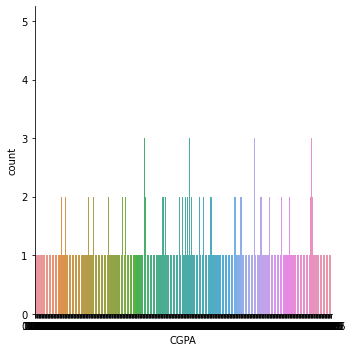

In [16]:
# Ploting grap to check range of cgpa

sns.catplot(x = 'CGPA' , data = dta , kind = 'count')

OBSERVATIONs

1. Highest CGPA score is approx. 3


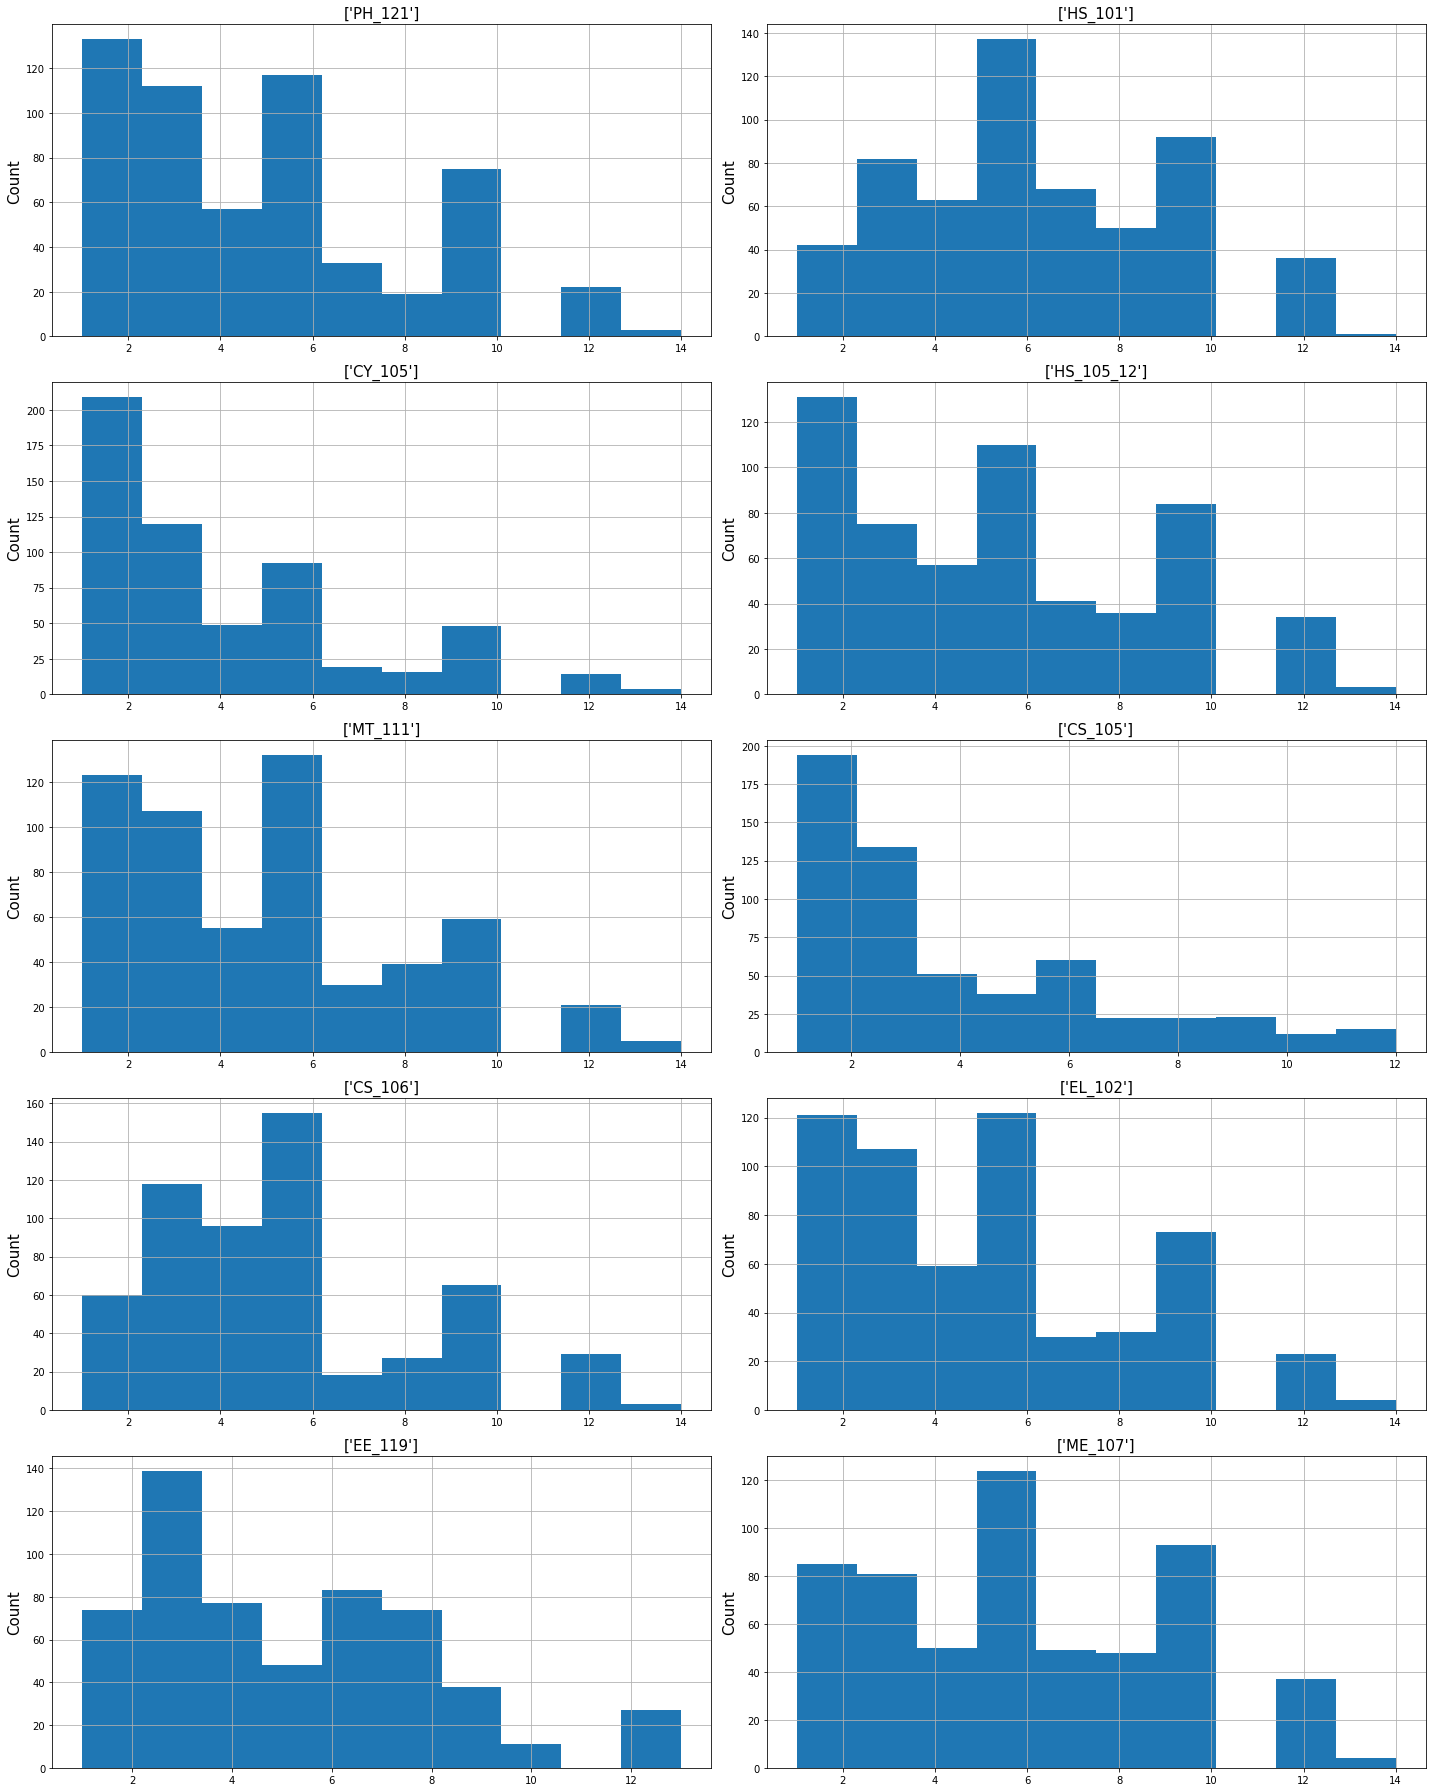

In [17]:
# lETS SEE HOW DATA IS DISTRIBUTED FOR EVERY COLUMN

collist = dta.columns[0:10].values

plt.figure(figsize=(20,25))
  
for i in range(0,len(collist)):
    plt.subplot(5,2,i+1)
    dta[collist[i]].hist()
    plt.title(f"{[collist[i]]}", fontsize = 15)
    plt.ylabel('Count', fontsize = 15)
    plt.tight_layout()

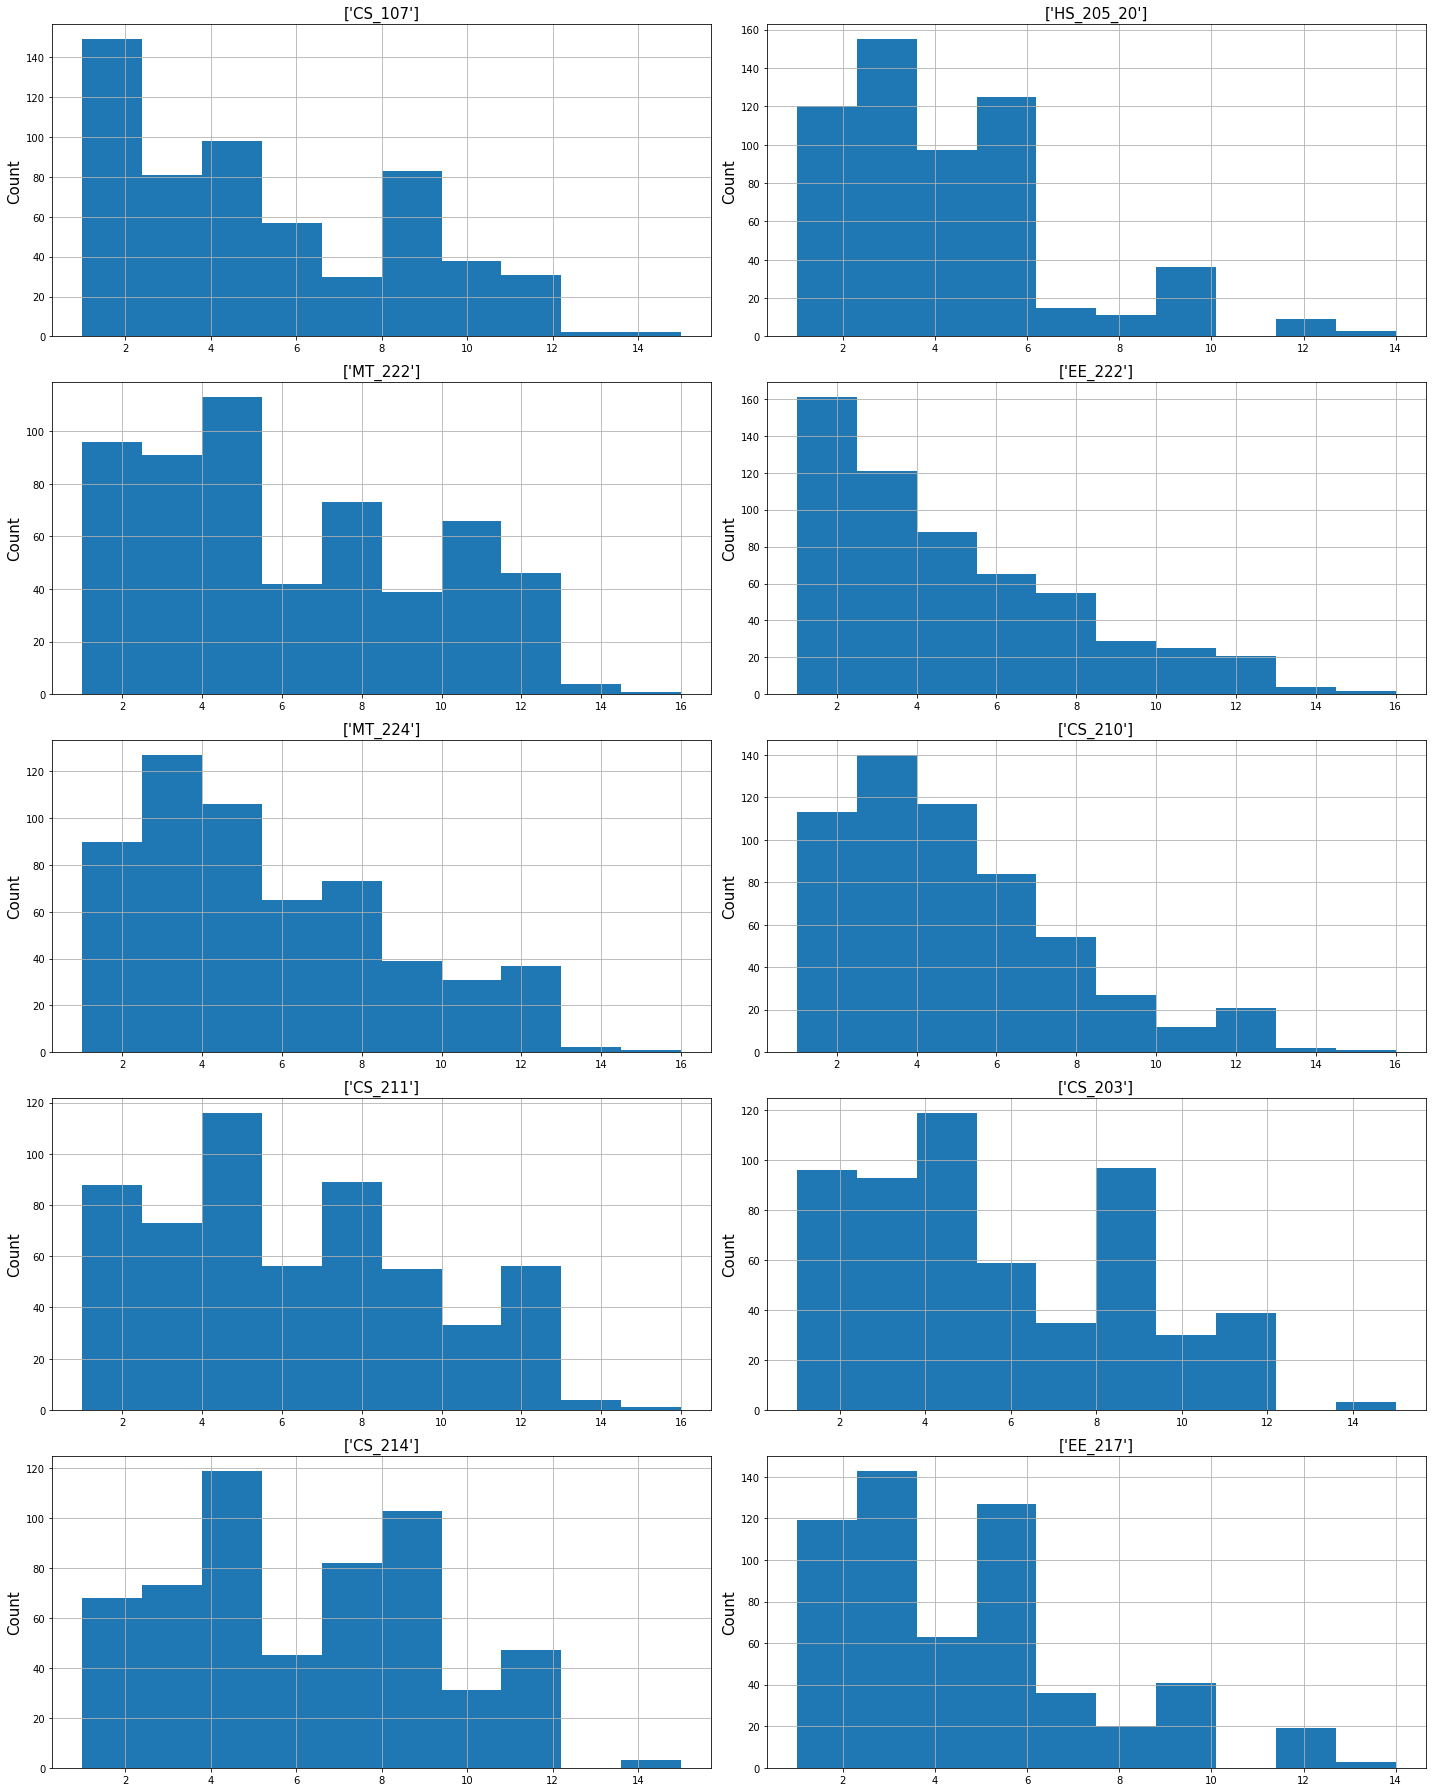

In [18]:
# lETS SEE HOW DATA IS DISTRIBUTED FOR EVERY COLUMN

collist = dta.columns[10:20].values

plt.figure(figsize=(20,25))
  
for i in range(0,len(collist)):
    plt.subplot(5,2,i+1)
    dta[collist[i]].hist()
    plt.title(f"{[collist[i]]}", fontsize = 15)
    plt.ylabel('Count', fontsize = 15)
    plt.tight_layout()

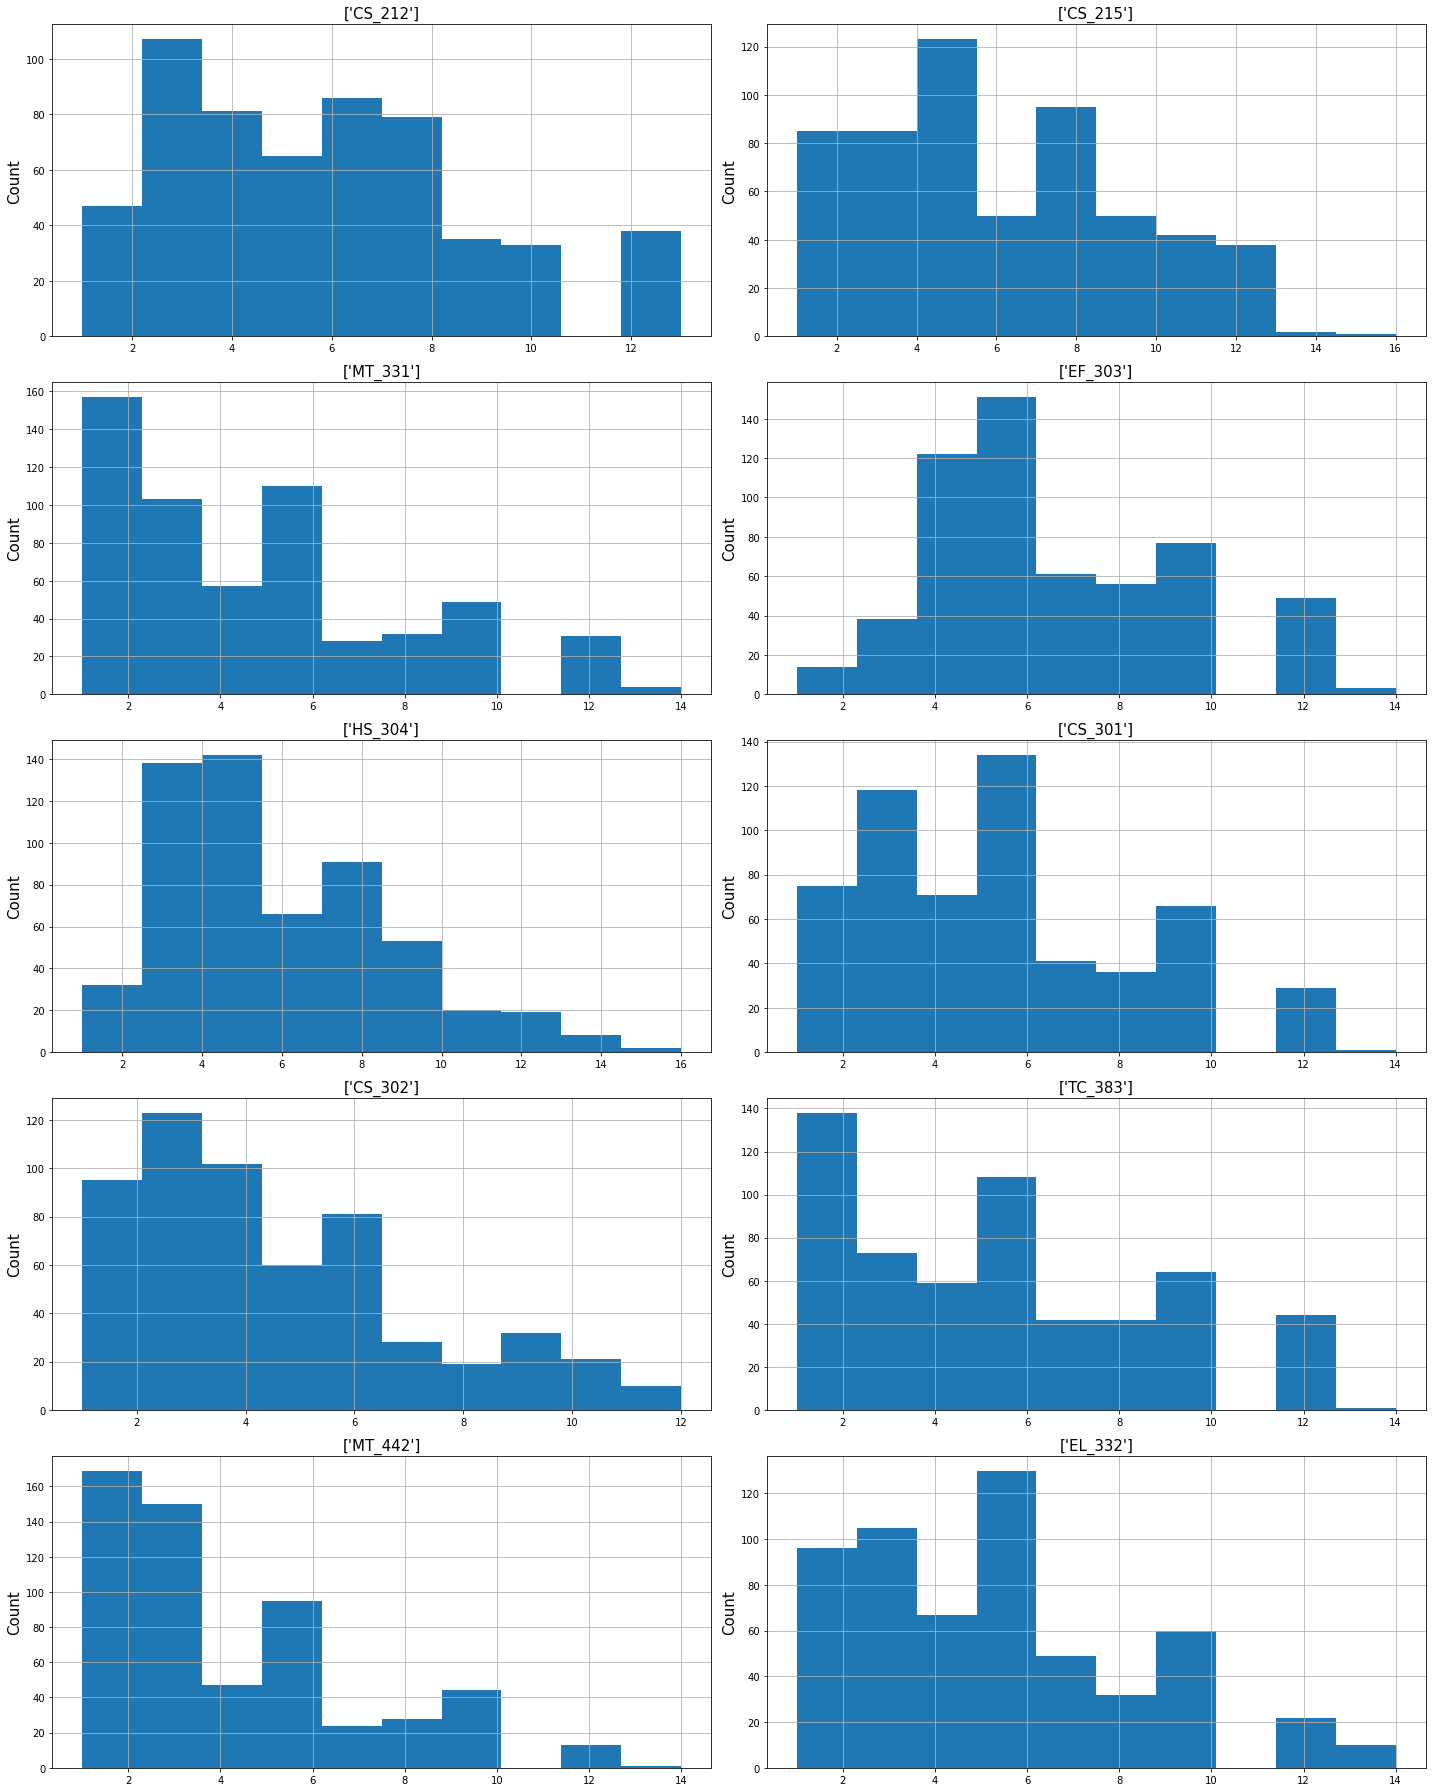

In [19]:
# lETS SEE HOW DATA IS DISTRIBUTED FOR EVERY COLUMN

collist = dta.columns[20:30].values

plt.figure(figsize=(20,25))
  
for i in range(0,len(collist)):
    plt.subplot(5,2,i+1)
    dta[collist[i]].hist()
    plt.title(f"{[collist[i]]}", fontsize = 15)
    plt.ylabel('Count', fontsize = 15)
    plt.tight_layout()

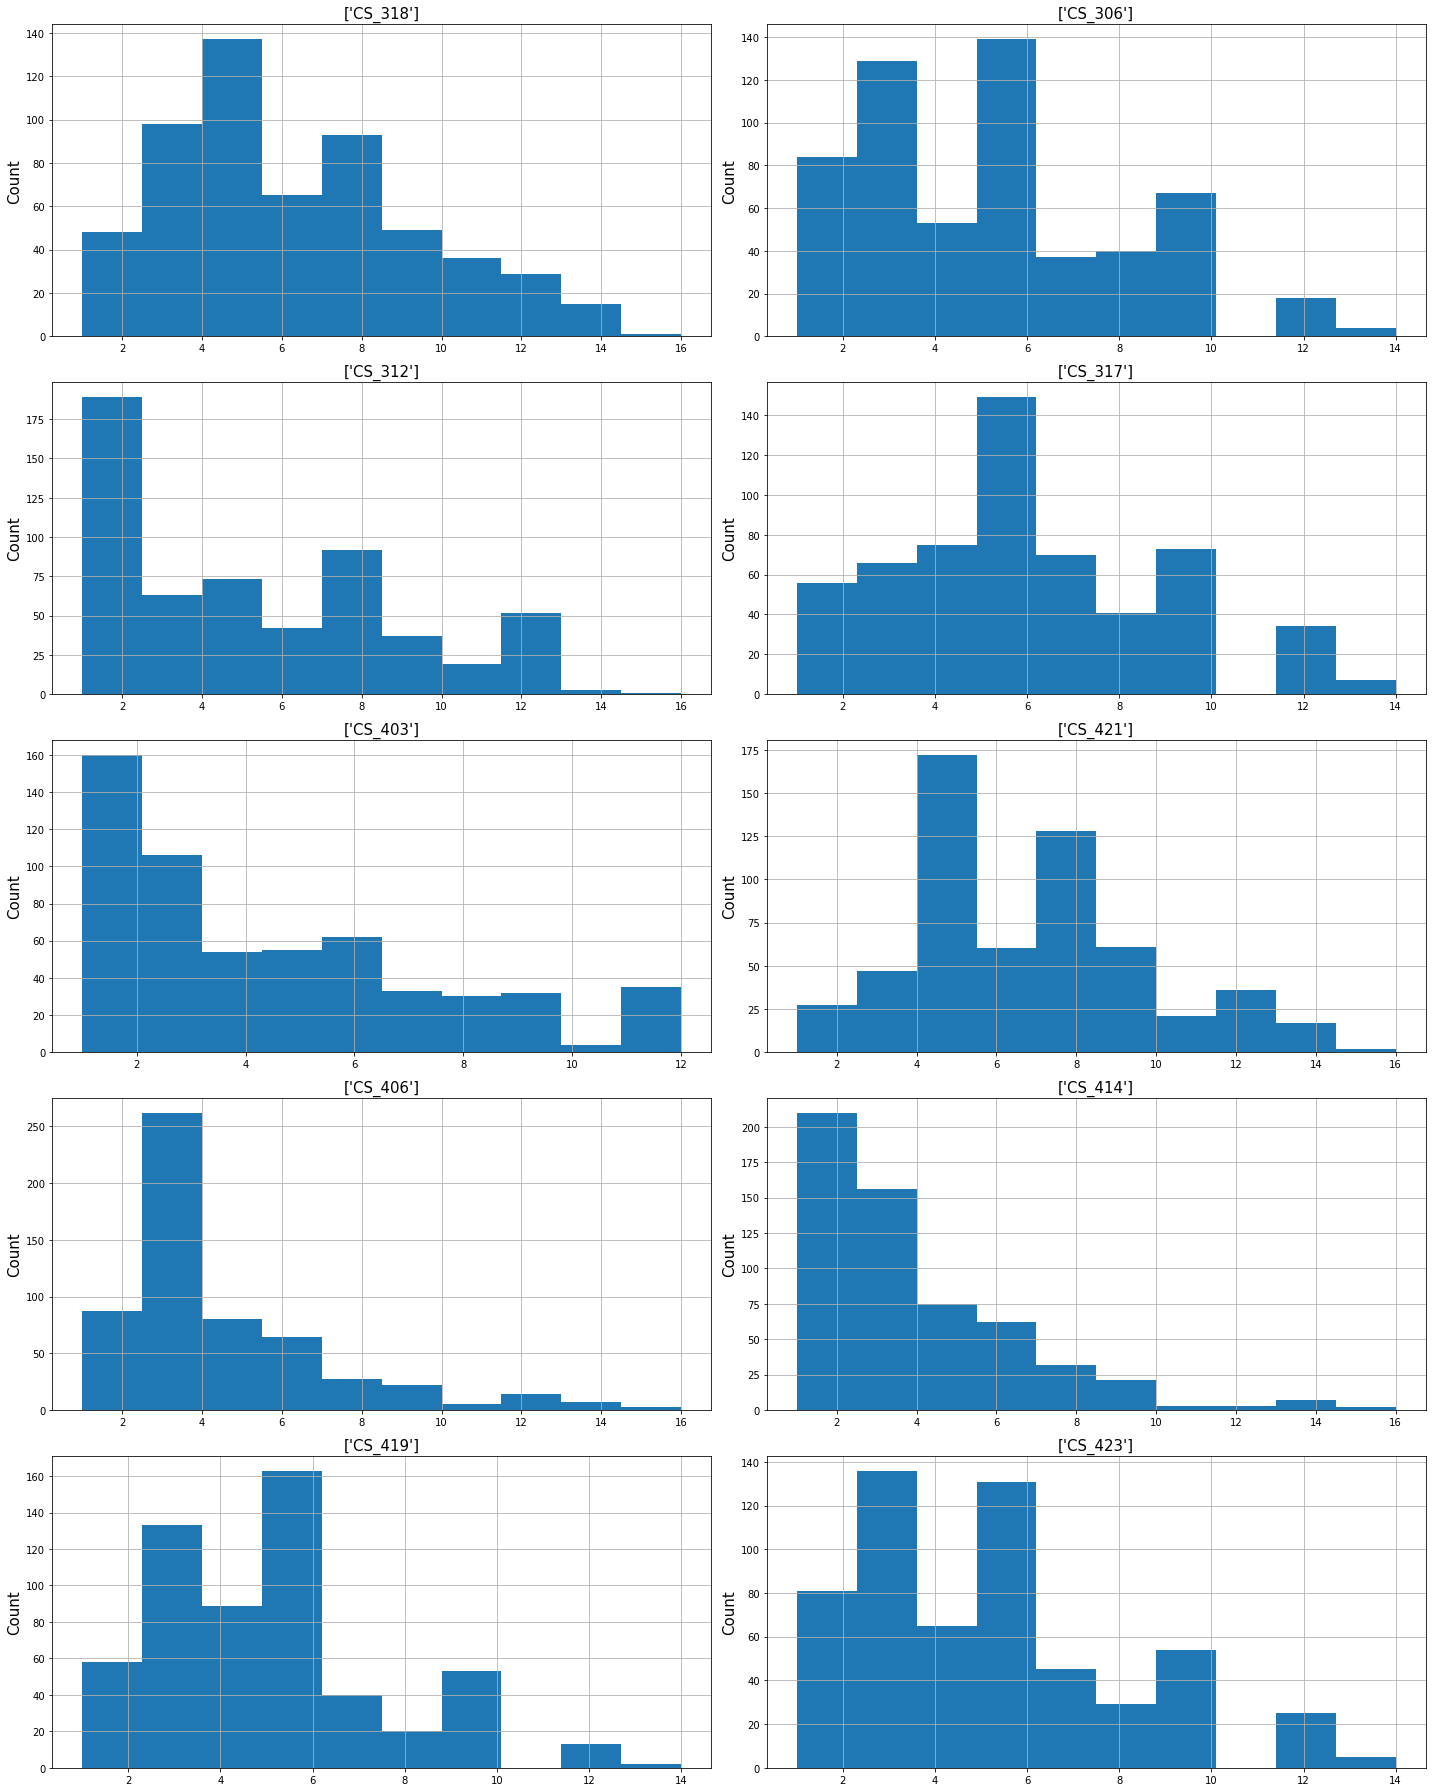

In [20]:
# lETS SEE HOW DATA IS DISTRIBUTED FOR EVERY COLUMN

collist = dta.columns[30:40].values

plt.figure(figsize=(20,25))
  
for i in range(0,len(collist)):
    plt.subplot(5,2,i+1)
    dta[collist[i]].hist()
    plt.title(f"{[collist[i]]}", fontsize = 15)
    plt.ylabel('Count', fontsize = 15)
    plt.tight_layout()

## Checking correlation of data by using heatmap

In [21]:
correlation = dta.corr()

<AxesSubplot:>

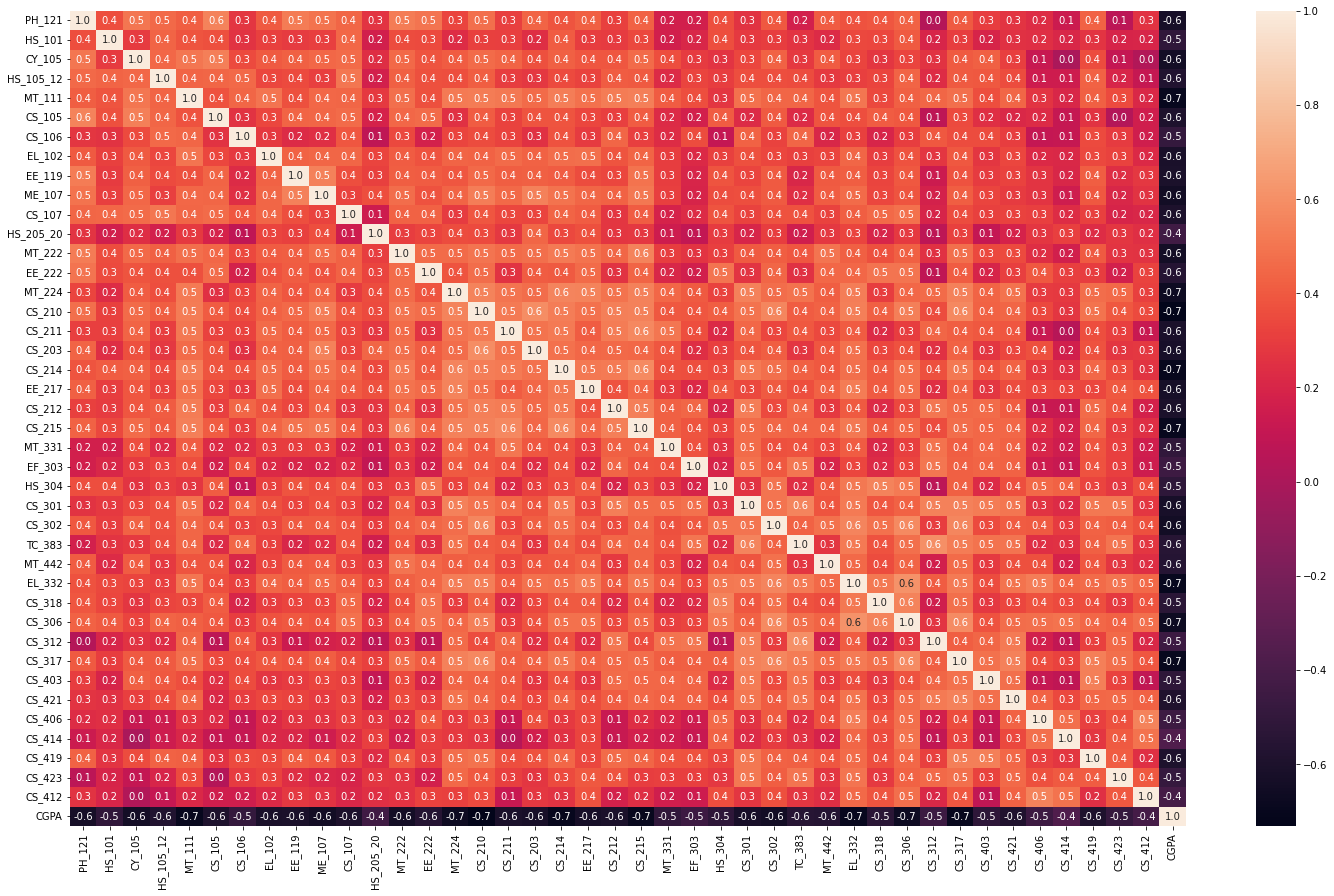

In [22]:
plt.figure (figsize = (25,15))
sns.heatmap(correlation, fmt = '.1f', annot = True)

In [23]:
X = dta.drop(columns='CGPA', axis = 1)
Y = dta ['CGPA']
print (X)

     PH_121  HS_101  CY_105  HS_105_12  MT_111  CS_105  CS_106  EL_102  \
0         5      12       8          7       8      12      10       8   
1         1      10      12         10       5       7      10       1   
2         1       4       1          5       6       1       5       6   
3        10       9      12         10      10       3      12       8   
4         3       3       3          6       1       1       3       6   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566       4       1       1          3       2       1       3       3   
567       2       1       1          1       1       1       1       3   
568       4       1       3          6       1       1       1       1   
569       1       6      10          1      10      12       5       8   
570       7      10      10          7       7      12       4       9   

     EE_119  ME_107  ...  CS_306  CS_312  CS_317  CS_403  CS_421  CS_406  \
0         5       8  ...       7   

In [24]:
print(Y)

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64


### spliting data into training and testing data (X and Y)

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.2, random_state = 2)

In [26]:
print (X.shape, X_train.shape, X_test.shape)

(571, 41) (456, 41) (115, 41)


Observation
1. We have now splited our data into train and test
2. Splited test data into 20%
3. As data is bit small need to check our data with the help of LinearRegression

## Linear Regression
As we know, linear regression shows the linear relationship between two variables. The equation of linear regression is similar to that of the slope formula.

We will use R-squred metrics

### R - Squared

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

In [27]:
# running linear regression through our x and y train and test data

regressor = LinearRegression ()

In [28]:
# Further data will be transfed by x and y train into regressor model

regressor.fit(X_train, Y_train)

LinearRegression()

In [29]:
training_data_prediction = regressor.predict(X_train)

In [30]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print ('R Squared value: ', r2_train)

R Squared value:  0.9171401032690627


In [31]:
regressor.fit(X_test, Y_test)

LinearRegression()

In [32]:
test_data_prediction = regressor.predict(X_test)

In [33]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print ('R Squared value: ', r2_test)

R Squared value:  0.9800049141096555


Observations:
    
1. We have achived approx 98% accurary with the help of this by using linear regression model
2. Furthe need to create build model to predict CPGA score


### Building model to predict CGPA

In [34]:
input_data = (1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5)

# Changing input_data to numpy array

input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the arrary

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) 
# We want value for 1 particular data point this is why reshaped to (1,-1)


prediction = regressor.predict (input_data_reshaped)
print ('YOUR CGPA IS = ', prediction)

YOUR CGPA IS =  [3.42068711]
